# Classification on CIFAR 10 Dataset

Instructions - 
1. In order to kick start, code for setting up the dataframes has already been given (Step 1 to 5)
2. Go through the entire code written below and put the relavent comment for each line of code. Understanding below mentioned code is very important.
3. After commenting the code in step 1 to 5, complete step 6 and 7

### Step - 1 (Setup Code)

In [2]:
# Run some setup code for this notebook.

import random
import numpy as np
import matplotlib.pyplot as plt
import os


#from __future__ import print_function

from builtins import range
from six.moves import cPickle as pickle
from imageio import imread
import platform

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

### Step - 2 (Download the dataset)

In [3]:
#!pip install wget

In [4]:
# # Use this code to download the dataset for the first time
# # You will be required to install wget using pip
# # For Linux users checkout the alternative for 'del'

#!wget http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz -O cifar-10-python.tar.gz
#!tar -xzvf cifar-10-python.tar.gz
#!del cifar-10-python.tar.gz

### Step - 3 (Load the Dataset)

In [5]:
# This cell loads the training and testing dataset. Please note the variables at
# the end of the cell as you would require them to access the train/test data 
# and labels throughout the assignment
def load_pickle(f):
    version = platform.python_version_tuple()
    if version[0] == '2':
        return  pickle.load(f)
    elif version[0] == '3':
        return  pickle.load(f, encoding='latin1')
    raise ValueError("invalid python version: {}".format(version))


def load_CIFAR_batch(filename):
    """ load single batch of cifar """
    with open(filename, 'rb') as f:
        datadict = load_pickle(f)
        X = datadict['data']
        Y = datadict['labels']
        X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("float")
        Y = np.array(Y)
        return X, Y


def load_CIFAR10(ROOT):
    """ load all of cifar """
    xs = []
    ys = []
    for b in range(1,6):
        f = os.path.join(ROOT, 'data_batch_%d' % (b, ))
        X, Y = load_CIFAR_batch(f)
        xs.append(X)
        ys.append(Y)
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X, Y
    Xte, Yte = load_CIFAR_batch(os.path.join(ROOT, 'test_batch'))
    return Xtr, Ytr, Xte, Yte


cifar10_dir = 'cifar-10-batches-py'

# Cleaning up variables to prevent loading data multiple times
try:
    del X_train, y_train
    del X_test, y_test
    print('Clear previously loaded data.')
except:
    pass

X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


### Step - 4 (Visualization)

Next we visualize the CIFAR-10 dataset. Although these functions are being written for you, we highly recommend you go through the code and make yourself familiar as these are things you will be required to do very often when working on AI/ML projects

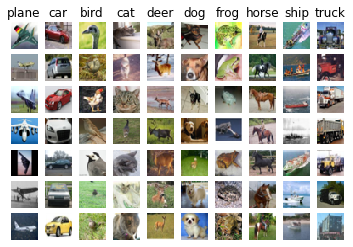

In [6]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

### Step - 5 (Flattening the images)

In the next cell we flatten each image into a single dimensional vector so that it is easy to process. You should be able to reason about the dimensions comfortable.

In [7]:
# Subsample the data for more efficient code execution in this exercise
num_training = 5000
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

num_test = 500
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

# Reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train.shape, X_test.shape)

y_train = y_train.reshape(-1,1)
y_test  = y_test.reshape(-1,1)
x= np.concatenate((X_train,X_test))
y = np.concatenate((y_train,y_test))  

print(x.shape, y.shape) 

(5000, 3072) (500, 3072)
(5500, 3072) (5500, 1)


### Step - 6 (Apply all possible classification algorithms)

For each algo complete the following steps with appropriate plots, diagrams and code - 
1. Discuss the intuition behind each algorithm
2. Mention pros and cons
3. Discuss about Model parameters and Hyperparameters
4. Discuss about overfitting and underfitting with relavant plots and code (Hint: Use cross validation and plot hyperparameter vs accuracy score)
5. Discuss about train and test time/space complexities
6. Measure the performance of model using various metrics and write in detail about each metric

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,precision_recall_fscore_support,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [9]:
import xgboost
from xgboost import XGBClassifier

C:\Users\janga\Anaconda3\lib\site-packages\dask\dataframe\utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [10]:
lr=LogisticRegression()

##KNN
knn=KNeighborsClassifier()

## Decision tree

    
dt=DecisionTreeClassifier()
        
 ## Randon Forest
    
forest_model=RandomForestClassifier()     

xgb = XGBClassifier()

ada = AdaBoostClassifier()

svc= SVC()

NB = GaussianNB()

In [11]:

def Model_cv(X1,Y1,model):
    np.random.seed(0)
    X_train,X_test,Y_train,Y_test=train_test_split(X1,Y1,test_size=0.3,random_state=100)
    sc=StandardScaler()
    
    X_train=sc.fit_transform(X_train)
    X_test=sc.fit_transform(X_test)
     
    model.fit(X_train,Y_train.ravel())
    #Test data prediction
    y_pred=model.predict(X_test)
    
    # Train data Predcition
    y_train_pred=model.predict(X_train)
    
    
    print(cross_val_score(model,X_train,Y_train,cv=7,scoring='accuracy').mean())


    training_Score = accuracy_score(Y_train,y_train_pred.round())
    testing_score = accuracy_score(Y_test,y_pred.round())
    
    print('Metrics for the model',model)
    print("Trainig Score_",  training_Score)
    print("Testing Score_",testing_score)
    print(confusion_matrix(Y_train,y_train_pred))
    print(confusion_matrix(Y_test,y_pred))
    print('Classification report on training',classification_report(Y_train,y_train_pred))
    print('Classification report on testing',classification_report(Y_test,y_pred))
    print('Precison Score on Training',precision_score(Y_train,y_train_pred.round(),average=None))
 
    print('Precison Score on Testing',precision_score(Y_test,y_pred.round(),average=None))

## KNN

* The KNN algorithms is a simple,easy to implement Supervised machine learning that can be used to solve both classification and regression Problems.


* K Nearest Neighbour is a simple algorithm that stores all the available cases and classifies the new data or case based on a similarity measure. It is mostly used to classifies a data point based on how its neighbours are classified.


* K is a number used to identify similar neighbors for the new data point.


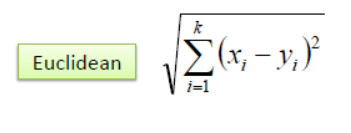

**To evaluate any techniques we have 3 aspects:**
- Easy to interpret output.
- Calculate Time.
- Predictive Power

* Lazy algorithm as KNN does not have a training step. All data points will be used only at the time of prediction. With no training step, prediction step is costly. An eager learner algorithm eagerly learns during the training step.

**Pro's**

* It is simple to implement.
* It is robust to the noisy training data
* It can be more effective if the training data is large.

**con's**
* Always needs to determine the value of K which may be complex some time.
* The computation cost is high because of calculating the distance between the data points for all the training samples.



In [11]:
Model_cv(x,y,knn)

C:\Users\janga\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\janga\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\janga\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\janga\AppData\Roaming\Python\Python37\site-packages\sklearn\mode

0.25922077922077924
Metrics for the model KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
Trainig Score_ 0.44753246753246756
Testing Score_ 0.26666666666666666
[[274   0  33   1  13   2  16   1  45   0]
 [ 50 117  43   5  56   7  26   5  61   7]
 [ 44   4 263  13  43   1  14   5  10   0]
 [ 25   2  85 156  63  13  18   5  13   0]
 [ 27   0  81   6 236   1  10   4  13   0]
 [ 31   3  84  41  84  96  21   3   9   1]
 [ 21   2  96   8  92   5 179   1   2   1]
 [ 49   1  72  18  91   9  29 102  11   0]
 [ 76   1  29   5  23  10   6   1 243   0]
 [ 64  19  51  18  39   9  21  14  85  57]]
[[92  0 26  2 12  2  4  1 37  1]
 [23 11 23  9 24  4  9  2 14  5]
 [21  2 85 10 34  2  6  1 12  0]
 [13  2 42 23 42  8 14  5  6  0]
 [18  0 58  4 73  1 13  3 11  0]
 [15  1 45 26 39 16 14  4  3  0]
 [ 8  0 67  9 45  4 32  0  1  0]
 [21  2 33  7 53  4 11 13  6  1]
 [59  

## Random Forest

* Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.


* As the name suggests, "Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset." Instead of relying on one decision tree, the random forest takes the prediction from each tree and based on the majority votes of predictions, and it predicts the final output.

**Pro's**

* Random Forest is capable of performing both Classification and Regression tasks.
* It is capable of handling large datasets with high dimensionality.
* It enhances the accuracy of the model and prevents the overfitting issue.

**Cons**

* Although random forest can be used for both classification and regression tasks, it is not more suitable for Regression tasks.


In [12]:
Model_cv(x,y,forest_model)

C:\Users\janga\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\janga\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\janga\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\janga\AppData\Roaming\Python\Python37\site-packages\sklearn\model_s

0.38103896103896107
Metrics for the model RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Trainig Score_ 1.0
Testing Score_ 0.3896969696969697
[[385   0   0   0   0   0   0   0   0   0]
 [  0 377   0   0   0   0   0   0   0   0]
 [  0   0 397   0   0   0   0   0   0   0]
 [  0   0   0 380   0   0   0   0   0   0]
 [  0   0   0   0 378   0   0   0   0   0]
 [  0   0   0   0   0 373   0   0   0   0]
 [  0   0   0   0   0   0 407   0   0   0]
 [  0   0   0   0   0   0   0 382   0   0]
 [  0   0   0 

In [13]:
Model_cv(x,y,lr)

C:\Users\janga\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\janga\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\janga\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL

0.27402597402597406
Metrics for the model LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Trainig Score_ 0.8602597402597403
Testing Score_ 0.25272727272727274
[[339   5   4   7   5   3   3   3  15   1]
 [  4 346   5   2   3   5   2   3   2   5]
 [ 14   4 319   7  12  10   6  12  10   3]
 [  4   4  13 313  14  16  11   1   2   2]
 [ 10   2  13  13 305  13   6  13   1   2]
 [  6   6  13  12   6 310   4   7   5   4]
 [  3   2   9   8   9   9 361   3   2   1]
 [  5   2  11   4  13   7   2 332   4   2]
 [ 23   3   7   5   0   1   1   3 347   4]
 [  5   7   4   6   4   3   0   2   6 340]]
[[47 12 10 12  7 15  8 10 36 20]
 [ 7 31 12  7 10  8 11 10  9 19]
 [19  8 39 19 26 16 14 15 11  6]
 [10  7 16 27 22 21 30  9  5  8]


C:\Users\janga\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [11]:
Model_cv(x,y,xgb)

C:\Users\janga\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\janga\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.4275324675324676
Metrics for the model XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)
Trainig Score_ 1.0
Testing Score_ 0.4484848484848485
[[385   0   0   0   0   0   0   0   0   0]
 [  0 377   0   0   0   0   0   0   0   0]
 [  0   0 397   0   0   0   0   0   0   0]
 [  0   0   0 380   0   0   0   0   0   0]
 [  0   0   0   0 378   0   0   0   0   0]
 [  0   0   0   0   0 373   0   0   0   0]
 [  0   0   0   0   0 

In [12]:
Model_cv(x,y,ada)

C:\Users\janga\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\janga\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\janga\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\janga\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when 

0.27272727272727276
Metrics for the model AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)
Trainig Score_ 0.2961038961038961
Testing Score_ 0.2733333333333333
[[105  15  17  15  16  20   7  24 111  55]
 [ 18 104  15  21  12  22  26   8  46 105]
 [ 37  21  51  13  81  32  98  19  28  17]
 [ 19  27  24  41  48  66  78  24  33  20]
 [ 22   9  29   8  98  43 124  16  11  18]
 [ 10  22  32  37  40 105  59   7  42  19]
 [  4  29  25  26  44  31 214  12   3  19]
 [ 27  21  14  13  70  41  52  69  22  53]
 [ 56  34  10  10   3  20   7   8 172  74]
 [ 39  40   5  14  10   8  19  23  38 181]]
[[40 11  8 12 12  5  4  6 54 25]
 [ 7 23  5  8  6  9 22  2 10 32]
 [19  8 18  7 33 20 40  8  6 14]
 [ 3 12 12 14 10 31 45 15  6  7]
 [ 4  4  9  7 41 20 63 14  9 10]
 [ 5  8 14 14 15 52 22 15 12  6]
 [ 3  6  9 10 25 17 78  8  6  4]
 [ 8  8  5  5 37 19 20 19  9 21]
 [36 14  1  2  2  8  4  6 72 38]
 [14 15 10  5  3  5  5 11 1

In [13]:
Model_cv(x,y,dt)

0.2275324675324675
Metrics for the model DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Trainig Score_ 1.0
Testing Score_ 0.2290909090909091
[[385   0   0   0   0   0   0   0   0   0]
 [  0 377   0   0   0   0   0   0   0   0]
 [  0   0 397   0   0   0   0   0   0   0]
 [  0   0   0 380   0   0   0   0   0   0]
 [  0   0   0   0 378   0   0   0   0   0]
 [  0   0   0   0   0 373   0   0   0   0]
 [  0   0   0   0   0   0 407   0   0   0]
 [  0   0   0   0   0   0   0 382   0   0]
 [  0   0   0   0   0   0   0   0 394   0]
 [  0   0   0   0   0   0   0   0   0 377]]
[[47 16 25 17  7  7  6 14 26 12]
 [ 7 25  8 11  

In [14]:
Model_cv(x,y,svc)

C:\Users\janga\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\janga\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\janga\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\janga\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when 

0.41844155844155845
Metrics for the model SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Trainig Score_ 0.7433766233766234
Testing Score_ 0.4412121212121212
[[297   3   9   2  10   2   8  11  40   3]
 [  3 304   3   3   5   8   4   6  19  22]
 [ 25   2 269   7  30  10  31  10   8   5]
 [  0   4  23 251  23  30  31   2   7   9]
 [ 26   4  41  10 230   6  33  10   6  12]
 [  6   5  22  12  18 274  22   8   3   3]
 [  3   4  32   8  24   7 319   2   3   5]
 [ 10   3  12   7  24   8  14 290   8   6]
 [ 23  15   3   7   7   6   2   3 318  10]
 [  9  14   4   3   7   3   8   6  13 310]]
[[ 83   5  11   5   3  10   6   4  34  16]
 [  1  55   4   5   3  11   8   1   3  33]
 [ 21   2  70  13  21   8  17  10   5   6]
 [  7   4  19  37  13  24  35   3   3  10]
 [  7   4  34  11  72   9  20  13   9

In [15]:
Model_cv(x,y,NB)

C:\Users\janga\AppData\Roaming\Python\Python37\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\janga\AppData\Roaming\Python\Python37\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\janga\AppData\Roaming\Python\Python37\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\janga\AppData\Roaming\Python\Python37\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expec

0.2823376623376624
Metrics for the model GaussianNB(priors=None, var_smoothing=1e-09)
Trainig Score_ 0.2992207792207792
Testing Score_ 0.31636363636363635
[[175  10   9   2  33  12  26   3  84  31]
 [ 36  63   9  11  33  33  61   4  47  80]
 [ 92   5  38   2 120  20  76  11  19  14]
 [ 59   8  20  29  59  63  88  11  21  22]
 [ 31   2  26   4 180  18  75  11  13  18]
 [ 47   8  20  12  84  99  60   8  21  14]
 [ 34   9  22  11 101  20 180   9   3  18]
 [ 37  16  17  13  92  29  41  52  23  62]
 [ 73  13   7   1  23  35  21   5 175  41]
 [ 41  22   3   7  17  12  36  17  61 161]]
[[93  6  3  0 16  5 10  3 31 10]
 [13 20  2  5 12 14 22  3  8 25]
 [35  2 12  2 55  5 40  4 10  8]
 [20  4 10  4 27 23 50  4  3 10]
 [12  1  8  0 84 13 40  8 11  4]
 [15  4 10  5 23 52 34  4 10  6]
 [14  0 10  3 47  3 74  3  4  8]
 [18  4  6  2 47 15 18 15  9 17]
 [44  5  2  3  7 10  6  3 80 23]
 [18 10  7  4  5  2 14  8 21 88]]
Classification report on training               precision    recall  f1-score   sup

In [12]:
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [13]:
sm=SMOTE(random_state=100,k_neighbors=6)

In [14]:
x_res,y_res=sm.fit_sample(x,y)

In [15]:
x_res.shape,y_res.shape

((5770, 3072), (5770,))

In [16]:
np.random.seed(0)
X1_train,X1_test,Y1_train,Y1_test=train_test_split(x_res,y_res,test_size=0.3,random_state=100)
sc=StandardScaler()
X1_train=sc.fit_transform(X1_train)
X1_test=sc.fit_transform(X1_test)

In [17]:
def Model(z,a,b,c,d):
    
    #Fitting the Classification Models
    z.fit(a,c)
    y_train_pred=z.predict(a)
    y_test_pred=z.predict(b)
    
    #cross Validation Score
    cv_z_score=(cross_val_score(z,a,c,scoring='accuracy',cv=7)).mean()
    
    #Accuracy of the training and testing
    training_Score = accuracy_score(c,y_train_pred)
    testing_score = accuracy_score(d,y_test_pred)
    print("cv_score", cv_z_score) 
    print("TRAINING SCORE",  training_Score)
    print("TESTING SCORE",testing_score)
    print("\n")
    print('--'*30)
    print('\n')
    print("TRAINING CONFUSION MATRIX")
    print(confusion_matrix(c,y_train_pred))
    print("\n")
    print('--'*30)
    print('\n')
    print("TESTING  CONFUSION MATRIX")
    print(confusion_matrix(d,y_test_pred))
    print('\n')
    print('--'*30)
    print('\n')
    print('CLASSIFICATION REPORT ON TRAINING')
    print(classification_report(c,y_train_pred))
    print('\n')
    print('--'*30)
    print('\n')
    print('CLASSIFICATION REPORT ON TESTING')
    print(classification_report(d,y_test_pred))
    print("\n")
    print('--'*30)
    print('\n')
    print('Precison Score on Training')
    print(precision_score(c,y_train_pred,average=None))
    print('\n')
    print('--'*30)
    print('\n')
    print('Precison Score on Testing')
    print(precision_score(d,y_test_pred,average=None))
    print('\n')
    print('--'*30)
    print('\n')
    print('recall Score on Training')
    print(recall_score(c,y_train_pred,average=None))
    print('\n')
    print('--'*30)
    print('\n')
    print('recall Score on Testing')
    print(recall_score(d,y_test_pred,average=None))
    print('\n')
    print('--'*30)
    print('\n')
    print('f1 Score on Training')
    print(f1_score(c,y_train_pred,average=None))
    print('\n')
    print('--'*30)
    print('\n')
    print('f1 Score on Testing')
    print(f1_score(d,y_test_pred,average=None))

In [18]:
#Model(lr,X_train,X_test,y_train,y_test)

In [24]:
Model(knn,X_train,X_test,y_train,y_test)

C:\Users\janga\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\janga\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\janga\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\janga\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:515: DataConversio

cv_score 0.27100378612983655
TRAINING SCORE 0.4534
TESTING SCORE 0.278


------------------------------------------------------------


TRAINING CONFUSION MATRIX
[[354   0  36   3  21   3  15   3  70   0]
 [ 72 150  35  11  72   8  30   4  69   9]
 [ 50   4 322  13  86   4  16   1  23   0]
 [ 44   2  92 179  85  24  36   4  19   1]
 [ 27   2 102   8 349   1  15   3  11   1]
 [ 36   1  98  45 107 150  29   6  13   3]
 [ 17   2 131  14 140  10 199   1   5   0]
 [ 53   2  99  23 132   7  23 126  17   4]
 [ 96   5  27   7  25   4   9   2 342   3]
 [ 87  21  57  16  58  10  27  14 112  96]]


------------------------------------------------------------


TESTING  CONFUSION MATRIX
[[28  0  8  1  5  0  0  0 14  1]
 [ 9  5  2  2  8  1  2  0 11  1]
 [ 9  1 29  1  6  2  2  0  1  0]
 [ 3  0 17  6 11  5  6  0  1  0]
 [ 6  0 12  2 14  0  2  0  4  0]
 [ 9  0 13  6 11  5  2  0  2  0]
 [ 4  0 20  1 17  0 12  0  0  0]
 [ 8  1  8  2 17  2  2  2  4  1]
 [14  0  3  0  5  2  0  0 33  0]
 [ 8  2  9  2 11  0

In [25]:
Model(forest_model,X_train,X_test,y_train,y_test)

C:\Users\janga\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\janga\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\janga\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\janga\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWa

cv_score 0.39379835850424083
TRAINING SCORE 1.0
TESTING SCORE 0.364


------------------------------------------------------------


TRAINING CONFUSION MATRIX
[[505   0   0   0   0   0   0   0   0   0]
 [  0 460   0   0   0   0   0   0   0   0]
 [  0   0 519   0   0   0   0   0   0   0]
 [  0   0   0 486   0   0   0   0   0   0]
 [  0   0   0   0 519   0   0   0   0   0]
 [  0   0   0   0   0 488   0   0   0   0]
 [  0   0   0   0   0   0 519   0   0   0]
 [  0   0   0   0   0   0   0 486   0   0]
 [  0   0   0   0   0   0   0   0 520   0]
 [  0   0   0   0   0   0   0   0   0 498]]


------------------------------------------------------------


TESTING  CONFUSION MATRIX
[[22  2  4  1  2  0  2  0 14 10]
 [ 1 18  1  0  0  1  4  3  5  8]
 [ 9  2 17  0  8  5  5  2  1  2]
 [ 2  3  8 10  4 13  4  1  1  3]
 [ 3  2 10  1  9  0  6  4  2  3]
 [ 3  1  4 10  6 12  4  2  3  3]
 [ 1  2  6  1 13  2 26  1  1  1]
 [ 5  5  5  2  7  3  3  7  2  8]
 [ 9  3  0  0  4  4  0  0 32  5]
 [ 5  7  1  2  0  0  0

In [26]:
Model(ada,X_train,X_test,y_train,y_test)

C:\Users\janga\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\janga\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\janga\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\janga\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when 

cv_score 0.2749888766695489
TRAINING SCORE 0.3164
TESTING SCORE 0.294


------------------------------------------------------------


TRAINING CONFUSION MATRIX
[[160  28  23  12  21  29  10  36 138  48]
 [ 28 152  17  13   7  34  30  11  54 114]
 [ 40  32  67  27  81  57 118  37  43  17]
 [ 29  36  33  60  46  72 117  38  25  30]
 [ 25  16  38  22 132  59 162  31  20  14]
 [ 31  35  37  28  46 137  86  33  39  16]
 [  8  25  31  33  61  43 274  22   2  20]
 [ 42  27  23  14  72  47  72 109  24  56]
 [ 77  36  13   5  17  31   5  14 234  88]
 [ 35  58   8  11  10  10  31  29  49 257]]


------------------------------------------------------------


TESTING  CONFUSION MATRIX
[[24  1  1  0  3  4  2  1 12  9]
 [ 2 14  1  0  1  3  4  1  5 10]
 [ 3  4  9  0  8  7 11  3  5  1]
 [ 1  6  2  2  3 13 13  4  3  2]
 [ 3  4  3  0  8  1 11  5  2  3]
 [ 7  3  5  2  5  9  7  5  3  2]
 [ 1  5  0  2  3  6 30  2  1  4]
 [ 7  3  4  0  6  2  7 10  3  5]
 [13  2  1  0  0  6  0  3 23  9]
 [ 7 12  1  0  1  2 

In [27]:
Model(dt,X_train,X_test,y_train,y_test)

cv_score 0.23719809602162542
TRAINING SCORE 1.0
TESTING SCORE 0.18


------------------------------------------------------------


TRAINING CONFUSION MATRIX
[[505   0   0   0   0   0   0   0   0   0]
 [  0 460   0   0   0   0   0   0   0   0]
 [  0   0 519   0   0   0   0   0   0   0]
 [  0   0   0 486   0   0   0   0   0   0]
 [  0   0   0   0 519   0   0   0   0   0]
 [  0   0   0   0   0 488   0   0   0   0]
 [  0   0   0   0   0   0 519   0   0   0]
 [  0   0   0   0   0   0   0 486   0   0]
 [  0   0   0   0   0   0   0   0 520   0]
 [  0   0   0   0   0   0   0   0   0 498]]


------------------------------------------------------------


TESTING  CONFUSION MATRIX
[[13  8  3  3  4  1  1  7  8  9]
 [ 2  7  3  2  7  3  1  1  5 10]
 [ 4  5 11  7  8  4  4  4  1  3]
 [ 3  6 11  4  3 10  5  6  1  0]
 [ 5  1  4  6  7  3  2  7  4  1]
 [ 2  4  3 11 11  5  5  3  3  1]
 [ 2  3  9  9  9  7  5  6  1  3]
 [ 7  4  1  6  6  4  5 10  2  2]
 [13  9  5  1  4  2  1  1 13  8]
 [ 6  8  4  4  0  3  2 

In [28]:
Model(svc,X_train,X_test,y_train,y_test)

C:\Users\janga\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\janga\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\janga\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\janga\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when 

cv_score 0.43240233156199537
TRAINING SCORE 0.7186
TESTING SCORE 0.404


------------------------------------------------------------


TRAINING CONFUSION MATRIX
[[363   8  17   5  10   8  11  11  57  15]
 [  5 356   6   3   7  11   5   7  24  36]
 [ 34   3 326  11  56  10  37  20  14   8]
 [  6   3  30 299  27  39  56   3  10  13]
 [ 30   6  42  11 335   9  41  21  11  13]
 [ 11   6  33  20  22 335  36  12   6   7]
 [  4   8  42   9  40   9 393   4   5   5]
 [ 16   8  19   9  41   6  13 353  10  11]
 [ 28  18   7   4   8  12   4   5 420  14]
 [ 12  16   6  12   5   2  11   7  14 413]]


------------------------------------------------------------


TESTING  CONFUSION MATRIX
[[24  1  1  1  1  2  2  3 17  5]
 [ 3 21  1  1  1  0  0  2  5  7]
 [ 6  2 18  4  5  7  6  2  1  0]
 [ 2  3  5 12  5 10  7  3  0  2]
 [ 3  2  8  0  8  3  9  3  1  3]
 [ 2  2  3 10  6 17  4  3  1  0]
 [ 2  2  6  2 13  1 24  2  1  1]
 [ 3  2  5  4  5  5  4 14  1  4]
 [ 7  2  1  1  1  3  0  1 35  6]
 [ 4  6  0  1  0  0

In [29]:
Model(NB,X_train,X_test,y_train,y_test)

C:\Users\janga\AppData\Roaming\Python\Python37\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\janga\AppData\Roaming\Python\Python37\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\janga\AppData\Roaming\Python\Python37\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\janga\AppData\Roaming\Python\Python37\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expec

cv_score 0.29439775910364147
TRAINING SCORE 0.3032
TESTING SCORE 0.29


------------------------------------------------------------


TRAINING CONFUSION MATRIX
[[233  17  10   3  40  18  31   8 112  33]
 [ 46  77  14  14  34  49  70   6  50 100]
 [113  11  45   5 148  20 113  15  28  21]
 [ 76  14  25  33  68  84 123  13  23  27]
 [ 37   4  33   5 236  27 117  14  25  21]
 [ 59  12  28  17  90 144  87  12  22  17]
 [ 50  11  28  10 126  23 231  12   6  22]
 [ 53  17  23   9 121  43  55  57  30  78]
 [102  17   8   3  27  40  25   7 233  58]
 [ 53  38  12   6  14  14  44  24  66 227]]


------------------------------------------------------------


TESTING  CONFUSION MATRIX
[[23  1  2  1  1  0  6  0 13 10]
 [ 2  8  0  0  4  4  9  1  7  6]
 [14  0  6  1 12  5  8  1  3  1]
 [ 7  2  2  1 10  8 12  2  1  4]
 [ 5  0  3  1 13  1 10  2  3  2]
 [10  0  3  2  9 12  5  1  4  2]
 [ 3  1  5  0 14  1 26  0  1  3]
 [ 7  4  3  4 10  3  3  3  4  6]
 [ 8  3  3  1  1  5  0  1 30  5]
 [ 3  3  1  2  1  1 

In [18]:
Model(xgb,X_train,X_test,y_train,y_test)

C:\Users\janga\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\janga\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\janga\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\janga\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y 

cv_score 0.43939617805164016
TRAINING SCORE 1.0
TESTING SCORE 0.458


------------------------------------------------------------


TRAINING CONFUSION MATRIX
[[505   0   0   0   0   0   0   0   0   0]
 [  0 460   0   0   0   0   0   0   0   0]
 [  0   0 519   0   0   0   0   0   0   0]
 [  0   0   0 486   0   0   0   0   0   0]
 [  0   0   0   0 519   0   0   0   0   0]
 [  0   0   0   0   0 488   0   0   0   0]
 [  0   0   0   0   0   0 519   0   0   0]
 [  0   0   0   0   0   0   0 486   0   0]
 [  0   0   0   0   0   0   0   0 520   0]
 [  0   0   0   0   0   0   0   0   0 498]]


------------------------------------------------------------


TESTING  CONFUSION MATRIX
[[28  1  4  0  3  1  2  2  7  9]
 [ 1 19  2  1  1  2  1  2  3  9]
 [ 5  2 20  7  6  5  3  2  1  0]
 [ 1  1  7 14  3 11  9  1  0  2]
 [ 1  0  6  2 15  3  6  4  1  2]
 [ 1  0  7  9  6 17  1  1  4  2]
 [ 0  2  4  0  8  1 34  2  2  1]
 [ 0  1  2  8  8  6  4 12  2  4]
 [10  5  0  4  0  1  0  1 36  0]
 [ 4  4  1  2  0  1  1

In [22]:
pip install lazypredict

  Using cached https://files.pythonhosted.org/packages/97/38/cadb2b79268c7f82f6b027bf0b2f68750aafc5c70b6e1bc46b357386e07b/lazypredict-0.2.9-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/29/31/580e1a2cd683fa219b272bd4f52540c987a5f4be5d28ed506a87c551667f/xgboost-1.1.1-py3-none-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/da/90/44d5e0a5d42506d2e31544c8f44c54be88c2128f6fc482c01de29ecfb365/pandas-1.0.5-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/70/8e/682770fc1da047bb56443150bfd8d87d850459cd7cc412a5311de3abaa4a/scikit_learn-0.23.1-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/9f/f3/0a83558da436a081344aa6c8b85ea5b5f05071214106036ce341b7769b0b/pytest-5.4.3-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/fb/aa/1a7ac452c52b93ab759d0b5b81c901ea122d95a5abf429decc660a44a2f1/PyYAML-5.3.1-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted

ERROR: astroid 2.3.1 requires typed-ast<1.5,>=1.4.0; implementation_name == "cpython" and python_version < "3.8", which is not installed.
ERROR: astroid 2.3.1 has requirement six==1.12, but you'll have six 1.15.0 which is incompatible.
ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\users\\janga\\anaconda3\\lib\\site-packages\\~-ipy\\.libs\\libansari.R6EA3HQP5KZ6TAXU4Y4ZVTRPT7UVA53Z.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



In [ ]:
from lazypredict.Supervised import LazyClassifier 

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(x_res,y_res,test_size=0.3,random_state=100)

In [ ]:
LC=LazyClassifier(predictions=True)

In [ ]:
models,prediction=LC.fit(X1_train,X1_test,Y1_train,Y1_test)    

In [ ]:
print(models)

In [ ]:
import pandas as pd
df=pd.DataFrame(models)
df

In [ ]:
Y= y_train
Y1=label_binarize(y_res,classes=[5,6,7,4,8,3])
n_classes=Y1.shape[1]

In [ ]:
def roc_curves(x,Y):
    Y1=label_binarize(Y,classes=[5,6,7,4,8,3])
    n_classes = Y1.shape[1]
    np.random.seed(0)
    X_train, X_test, Y_train, Y_test = train_test_split(x_res, Y1, test_size=.3,random_state=100)
    clf = OneVsRestClassifier(x)
    
    clf.fit(X_train,Y_train)
    
    y_score = clf.predict_proba(X_test)
    fpr=dict()
    tpr=dict()
    roc_auc=dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    print(roc_auc)
    for i in range(n_classes):
        plt.figure()
        plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic example')
        plt.legend(loc="lower right")
        plt.show()

In [ ]:
roc_curves(knn,Y1)

In [ ]:
roc_curves(dt,Y1)

In [ ]:
roc_curves(forest_model,Y1)

In [ ]:
roc_curves(ada,Y1)

In [ ]:
roc_curves(NB,Y1)

In [ ]:
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  
grid = GridSearchCV(svc, param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, Y_train) 

In [ ]:
print(grid.best_params_) 

In [ ]:
svm=svm.SVC(C=0.1,kernel='rbf',gamma=1)

In [ ]:
Model_cv(X_train,Y_train,svc)

In [ ]:
Model_cv(X_test,Y_test,svc)